
===== Dataset Loaded =====
         income  spending_habits       savings  investment_preferences
0  67450.712295      3286.229888   7027.861706            25298.920317
1  57926.035482      3448.627621  12003.124885            13544.842731
2  69715.328072      3866.440995  15026.218499            26087.241441
3  82845.447846      3843.041642  15234.902969            29489.465012
4  56487.699379      1897.864506  12749.672643            22894.044323

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   income                  200 non-null    float64
 1   spending_habits         200 non-null    float64
 2   savings                 200 non-null    float64
 3   investment_preferences  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None

Statistical Summary:
              income  spending_habits     

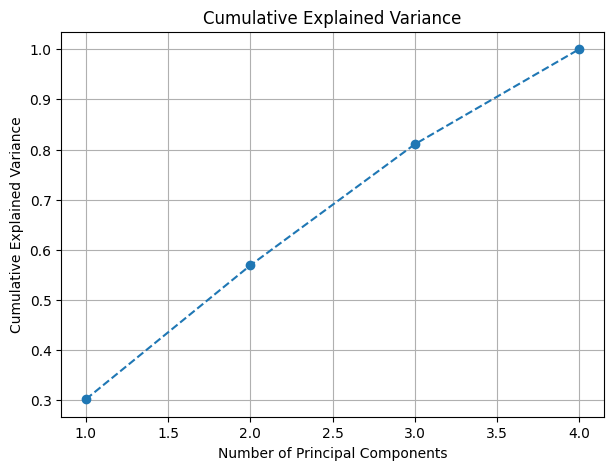


Selected Number of Components (90% variance): 4

Reduced dataset shape: (200, 4)

Principal Component Composition:
       income  spending_habits   savings  investment_preferences
PC1 -0.488060        -0.506016  0.592393                0.393467
PC2  0.655423        -0.146861 -0.074999                0.737040
PC3  0.086631         0.760223  0.628804                0.138428
PC4  0.569836        -0.380054  0.498048               -0.531784


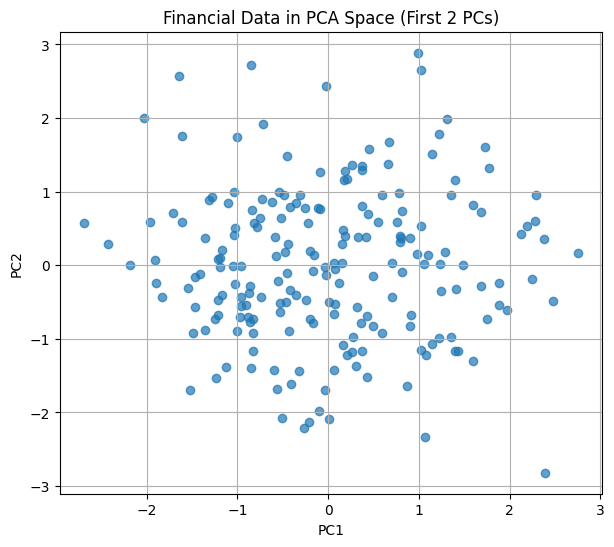


===== INSIGHTS BASED ON PCA =====
PC1 is dominated by savings → represents saving tendency.

General Interpretation:

• PC1 usually represents overall financial power (income + savings + investments)
• PC2 often captures spending–saving trade-offs
• PCA reduces 4D financial data to simpler 2D or 3D patterns
• Helps identify customer groups (big earners, high spenders, investors, savers)



In [1]:
# ===============================
#   TASK 3 – PCA IMPLEMENTATION
# ===============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# ------------------------------------------------------
# (1) Create a sample financial dataset for demonstration
# ------------------------------------------------------

np.random.seed(42)

data = {
    "income": np.random.normal(60000, 15000, 200),
    "spending_habits": np.random.normal(3000, 800, 200),
    "savings": np.random.normal(15000, 5000, 200),
    "investment_preferences": np.random.normal(20000, 7000, 200)
}

df = pd.DataFrame(data)

print("\n===== Dataset Loaded =====")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nStatistical Summary:")
print(df.describe())

# ------------------------------------------
# (2) Select relevant numerical features only
# ------------------------------------------

features = ['income', 'spending_habits', 'savings', 'investment_preferences']
X = df[features]

# -------------------------
# (3) Standardizing the data
# -------------------------

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------------
# (4) Apply PCA to standardized dataset
# ------------------------------------

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("\nExplained Variance Ratio (Each Component):")
print(explained_variance)

print("\nCumulative Explained Variance:")
print(cumulative_variance)

# -----------------------------
# (5) Plot cumulative variance
# -----------------------------

plt.figure(figsize=(7,5))
plt.plot(range(1, len(features)+1), cumulative_variance, marker='o', linestyle='--')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid()
plt.show()

# -----------------------------------------------------
# (6) Automatically select components covering 90% variance
# -----------------------------------------------------

n_components = np.argmax(cumulative_variance >= 0.90) + 1
print(f"\nSelected Number of Components (90% variance): {n_components}")

# -----------------------------------------------------
# (7) Apply PCA again using selected number of components
# -----------------------------------------------------

pca_final = PCA(n_components=n_components)
X_reduced = pca_final.fit_transform(X_scaled)

print(f"\nReduced dataset shape: {X_reduced.shape}")

# ---------------------------------------------------------
# (8) Display the principal components (feature contributions)
# ---------------------------------------------------------

components = pd.DataFrame(
    pca_final.components_,
    columns=features,
    index=[f"PC{i+1}" for i in range(n_components)]
)

print("\nPrincipal Component Composition:")
print(components)

# -----------------------------------------
# (9) Visualize Reduced Data (Only If 2 PCs)
# -----------------------------------------

if n_components >= 2:
    plt.figure(figsize=(7,6))
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], alpha=0.7)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("Financial Data in PCA Space (First 2 PCs)")
    plt.grid()
    plt.show()

# ------------------------------------------------------
# (10) Insights based on PCA
# ------------------------------------------------------

print("\n===== INSIGHTS BASED ON PCA =====")

if abs(components.loc["PC1"]).idxmax() == "income":
    print("PC1 is strongly driven by income → represents financial strength.")
if abs(components.loc["PC1"]).idxmax() == "spending_habits":
    print("PC1 is driven by spending → represents spending behavior.")
if abs(components.loc["PC1"]).idxmax() == "savings":
    print("PC1 is dominated by savings → represents saving tendency.")
if abs(components.loc["PC1"]).idxmax() == "investment_preferences":
    print("PC1 captures investment behavior.")

print("\nGeneral Interpretation:")
print("""
• PC1 usually represents overall financial power (income + savings + investments)
• PC2 often captures spending–saving trade-offs
• PCA reduces 4D financial data to simpler 2D or 3D patterns
• Helps identify customer groups (big earners, high spenders, investors, savers)
""")
